คราวนี้เราจะมาลองสร้าง Dataset ของตัวเอง เพื่อเทรนโมเดล 

* Acne สิว 
* Melasma ฝ้า
* Freckle กระ

# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล



In [17]:
folder = 'acne'
file = 'urls_acne.txt'

In [20]:
folder = 'melasma'
file = 'urls_melasma.txt'

In [23]:
folder = 'freckle'
file = 'urls_freckle.txt'

Create folder and download all pictures in urls

In [24]:
path = Path('data/skin')
download_path = path/'downloads'
dest = download_path/folder
dest.mkdir(parents=True, exist_ok=True)

In [25]:
download_images(path/file, dest, max_pics=300)

Error http://www.cosmetictown.com/uploads/news/1504113887_Tattoo_Freckle_on_Face.jpg HTTPSConnectionPool(host='www.cosmetictown.com', port=443): Max retries exceeded with url: /uploads/news/1504113887_Tattoo_Freckle_on_Face.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://makeup2019x.ml/thumb/56gg.jpg HTTPSConnectionPool(host='makeup2019x.ml', port=443): Max retries exceeded with url: /thumb/56gg.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f9ae4f260f0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))


Check for broken files

In [26]:
classes = ['melasma','freckle','acne']

In [27]:
for c in classes:
    print(c)
    verify_images(download_path/c, delete=True, max_size=500)

melasma


cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000178.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000188.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000015.png'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000197.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000227.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000294.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000192.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000005.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000287.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000018.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000169.png'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000284.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000159.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000240.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/melasma/00000052.jpg'>
cannot identify image file <_io.Buffered

cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000219.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000151.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000242.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000192.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000279.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000129.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000125.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000290.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000245.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/freckle/00000090.jpg'>
acne


cannot identify image file <_io.BufferedReader name='data/skin/downloads/acne/00000087.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/acne/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/acne/00000279.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/acne/00000125.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/skin/downloads/acne/00000223.jpg'>
cannot identify image file <_io.BufferedReader name='data/skin/downloads/acne/00000051.jpg'>


# 3. เตรียมข้อมูล

เพิ่มขนาดรูปจาก 224 เป็น 299 และลดขนาด batch size เหลือ 64 เนื่องจากโมเดลที่ขนาดใหญ่ขึ้น มีความต้องการ Memory ที่มากขึ้น ถ้าใช้ Batch Size เท่าเดิมจะทำให้ Error GPU Out of Memory ได้

In [28]:
batchsize = 64
np.random.seed(55)

databunch = ImageDataBunch.from_folder(download_path, train='.', 
                                       valid_pct=0.2, 
                                       ds_tfms=get_transforms(), 
                                       size=320, bs=batchsize).normalize(imagenet_stats)

## สำรวจข้อมูล ##

ลองดูข้อมูล Batch แรก ด้วย show_batch สั่งให้แสดง รูป พร้อม label ชื่อพันธุ์ไว้บนรูป แสดง 3 แถว (rows) ในกรอบขนาด 12 x 9 นิ้ว (figsize)

*เราสามารถรัน cell นี้หลายครั้ง เพื่อเรียกดู batch ต่อ ๆ ไป ได้เรื่อย ๆ เป็นการสำรวจข้อมูล*

In [29]:
databunch.classes

['acne', 'freckle', 'melasma']

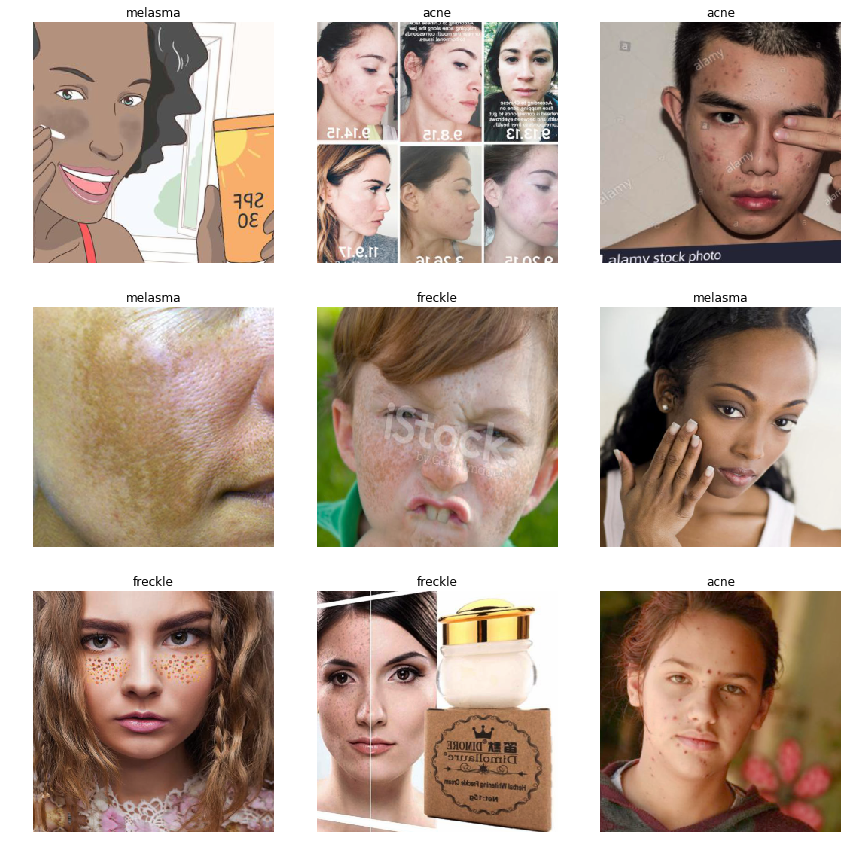

In [30]:
databunch.show_batch(rows=3, figsize=(12, 12))

In [31]:
databunch.classes, databunch.c, len(databunch.train_ds), len(databunch.valid_ds)

(['acne', 'freckle', 'melasma'], 3, 664, 166)

# 4. สร้างโมเดล

เปลี่ยนจาก models.resnet34 เป็น models.resnet50

In [32]:
learner = cnn_learner(databunch, models.resnet34, metrics=accuracy)

# 5. เริ่มต้นเทรนโมเดล

เทรนด้วยค่า Default ไป 8 Cycle

In [33]:
learner.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.345260,1.046745,0.500000,00:07
1,1.240552,0.932929,0.524096,00:07
2,1.102312,0.821079,0.668675,00:06
3,0.984258,0.864872,0.626506,00:07
4,0.904427,0.867745,0.608434,00:06
5,0.831090,0.836043,0.638554,00:07
6,0.789294,0.820916,0.632530,00:07
7,0.743327,0.826150,0.638554,00:07


เรามา Save Model ที่เราเพิ่งเทรนไปเก็บไว้ก่อน

In [34]:
learner.save('01d-resnet50-1')

โหลดโมเดลที่เรา Save ไว้ ขึ้นมาใหม่ เตรียมเทรนในขึ้นตอนถัดไป (ที่คอมเม้นท์ไว้ เพราะถ้าไม่ได้เปลี่ยนอะไรก็จะได้ไม่ต้องรัน)

In [35]:
# learner.load('01d-resnet50-1')

# 6. เทรนต่อ

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


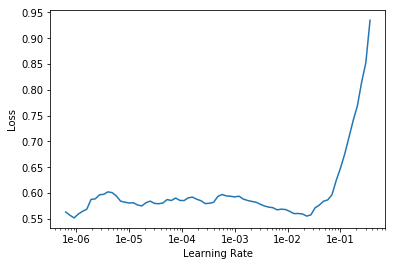

In [36]:
learner.lr_find()
learner.recorder.plot()

unfreeze layer ทุก Layer ให้สามารถเทรนได้ แล้วเทรนต่อทั้งโมเดล

In [37]:
learner.unfreeze()
learner.fit_one_cycle(6, max_lr=slice(3e-6,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.610891,0.819715,0.638554,00:07
1,0.587949,0.779868,0.668675,00:07
2,0.554140,0.776952,0.674699,00:07
3,0.523127,0.751637,0.692771,00:08
4,0.477215,0.743835,0.692771,00:08
5,0.457866,0.739498,0.722892,00:08


## สำเร็จแล้ว ##

เพียงแค่เวลา 10 นาทีเศษ เราเทรน Model ได้ accuracy ประมาณ 0.95 หรือ ความแม่นยำประมาณ 95%

เปรียบเทียบกับ 94.0% จาก ResNet34 ที่เราเทรนครั้งก่อน 

เรามา Save Model ที่เราเพิ่งเทรนไปเก็บไว้ก่อน

In [63]:
learner.save('01d-resnet50-2')

In [64]:
# learner.load('01d-resnet50-2')

# 7. ดูผลลัพธ์

In [65]:
interpretation = ClassificationInterpretation.from_learner(learner)

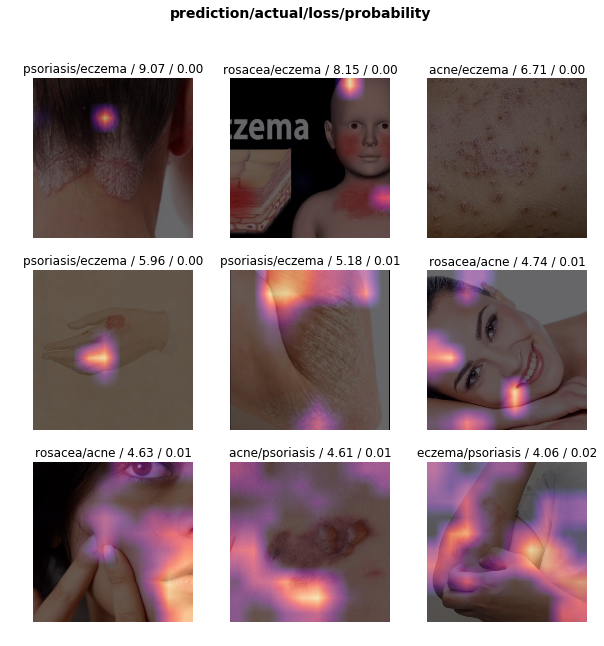

In [66]:
interpretation.plot_top_losses(9, figsize=(10,10))

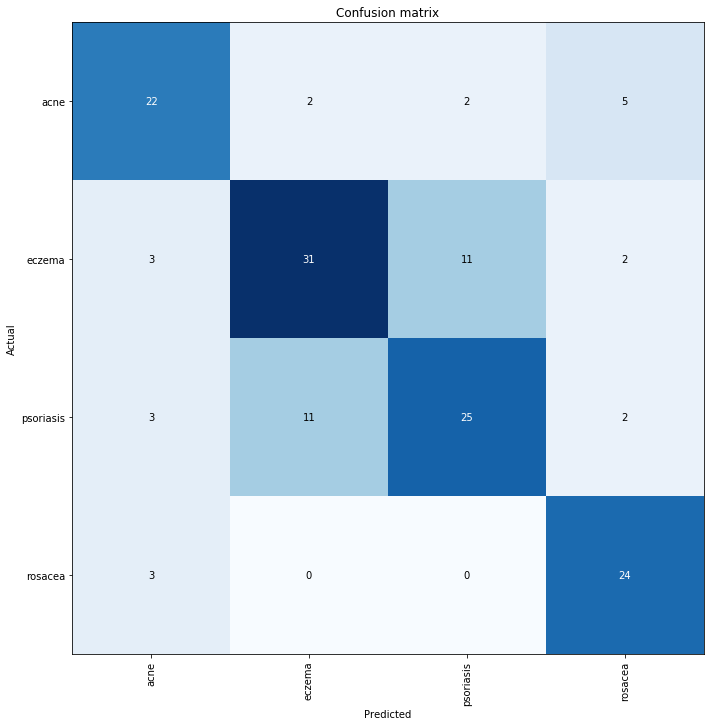

In [67]:
interpretation.plot_confusion_matrix(figsize=(10,10), dpi=72)

เรียกดู most_confused คือ พันธุ์ที่โมเดลทายผิดมากที่สุดเรียงลงไป

In [68]:
interpretation.most_confused(min_val=2)

[('eczema', 'psoriasis', 11),
 ('psoriasis', 'eczema', 11),
 ('acne', 'rosacea', 5),
 ('eczema', 'acne', 3),
 ('psoriasis', 'acne', 3),
 ('rosacea', 'acne', 3),
 ('acne', 'eczema', 2),
 ('acne', 'psoriasis', 2),
 ('eczema', 'rosacea', 2),
 ('psoriasis', 'rosacea', 2)]

Clean ข้อมูล

In [ ]:
from fastai.widgets import *

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learner, ds_type=DatasetType.Valid)

In [ ]:
ImageCleaner(ds, idxs, path)

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learner, ds_type=DatasetType.Valid)

In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

# 8. สรุป


เปรียบเทียบกับเคสก่อนที่ใช้ ResNet34 กับ เคสนี้เราใช้ ResNet50 

* โมเดลใช้เวลาในการเทรนนานขึ้น จาก 3 นาที เป็น 10 นาที
* ใช้ memory GPU มากขึ้น 
* ประสิทธิภาพความแม่นยำดีขึ้น ประมาณ 1%

# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 2](https://course.fast.ai/videos/?lesson=2)